# **Background of data**

***Data Set Link: https://www.kaggle.com/ronitf/heart-disease-uci***

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1.

**Problem we are trying to solve**

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

# FEATURE EXPLANATION

1. `age` - age in years
2. `sex` - (1 = male; 0 = female)
3. `cp` - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. `chol` - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. `restecg` - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. `thalach` - maximum heart rate achieved
9. `exang` - exercise induced angina (1 = yes; 0 = no)
10. `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. `slope` - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. `ca` - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. `thal` - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

References:
* https://pythonprogramming.net/styles-matplotlib-tutorial/
* https://stackoverflow.com/questions/20937538/how-to-display-pandas-dataframe-of-floats-using-a-format-string-for-columns

#  Import modules 

In [59]:
# !pip install matplotlib (if matplotlib is not installed)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline  
# it will make your plot outputs appear and be stored within the notebook, you don't need to use plt.show() everytime.

sns.set_style("whitegrid") 
# The style parameters control properties like the color of the background and whether a grid is enabled by default.
# plt.style.use("fivethirtyeight") 


In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# EDA

Here, we are trying to understand data in a better way by looking for following answers:
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [61]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1


## Missing values

In [62]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

* Plotly's main object is Figure() object.
* add_trace can consider as 'stacking figures'.
      These libraries are used:
        *import plotly.graph_objects as go
        *import plotly.express as px
        *import plotly.figure_factory as ff

In [5]:
# pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [64]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
import missingno as msno

<AxesSubplot:>

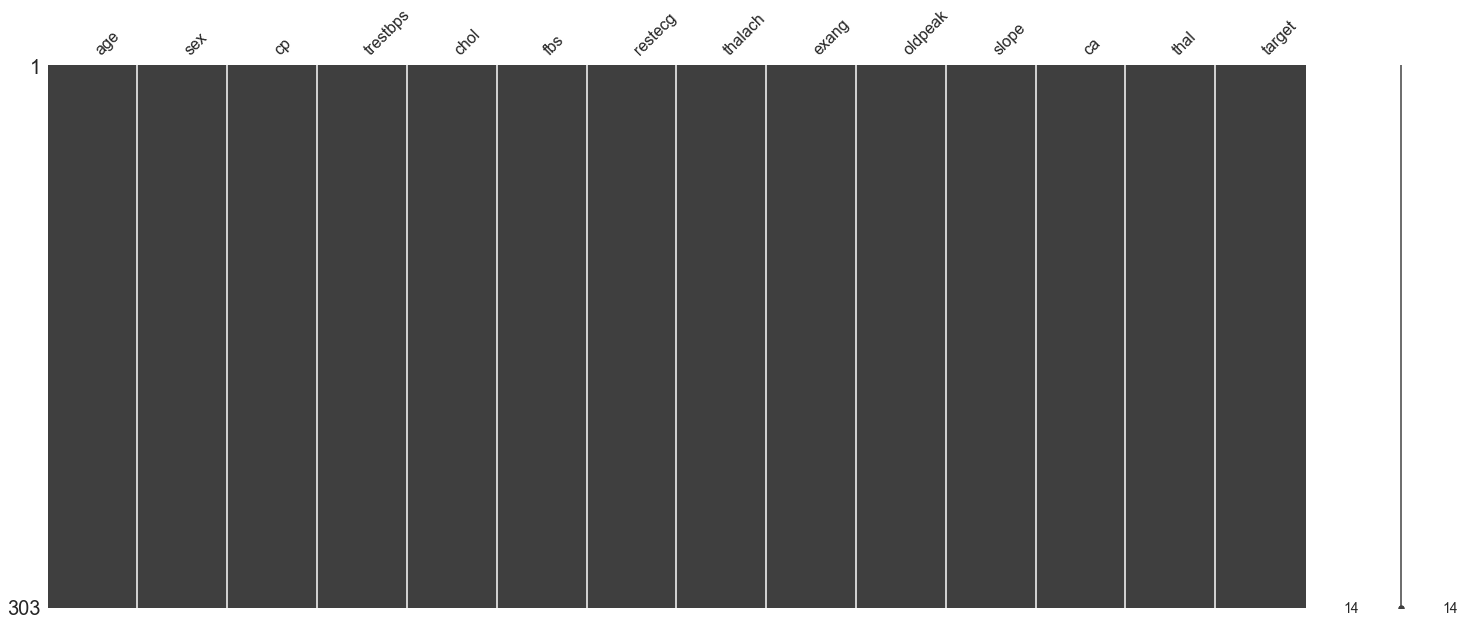

In [7]:
msno.matrix(data)

This shows that our dataset has no missing value.

##  Bar Plot 



## Countplot

### Seaborn : countplot, barplot + value_counts()

In seaborn, we can easily draw these graph

- **[Countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)** : Show the counts of observations in each categorical bin using bars.

Let's plot seaborn countplot.

**Little tips**
- If you want to make it vertical, replace x by y.
- Use `alpha` parameter to set opacity for more readable plot
- Use `hue` to find features' trend
- use `plt.xticks` or `plt.yticks` to rotation xaxis label.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

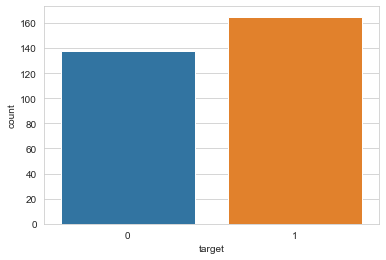

In [8]:
# f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('target',data=data)
# ax.set_title('Count of people')

Here the frequency of the observation is plotted. In this case we are plotting the frequency of the target values in the dataset, i.e people who have and don't have diseases. This tells us that in our dataset we have more number of people who had heart disease.

### Matplotlib

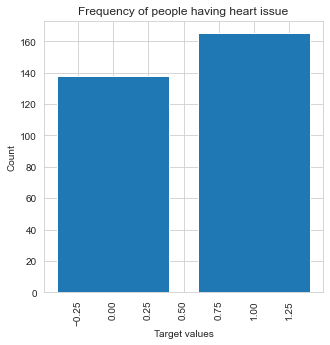

In [10]:
plt.figure(figsize=(5,5))
counts = data["target"].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.xlabel('Target values')
plt.ylabel('Count')
plt.title("Frequency of people having heart issue")
plt.show()

### Finding relation between target and other categorical variables

No handles with labels found to put in legend.


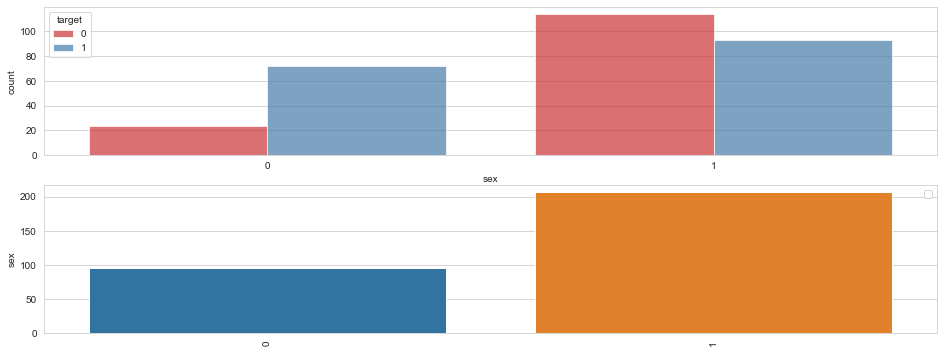

In [11]:
fig, ax = plt.subplots(2,1,figsize=(16, 6))
# type 1 : use hue parameter
sns.countplot(x='sex', data=data, hue='target', palette='Set1', alpha=0.7, ax=ax[0])
plt.legend()
plt.xticks(rotation='vertical')

#type 2: use value_counts + barplot / hard to divide like hue 
sns.barplot(x=data['sex'].value_counts().index, y=data['sex'].value_counts(), ax=ax[1])
plt.show()

From this graph, we can tell that 0 i.e female have high chances to get heart disease

No handles with labels found to put in legend.


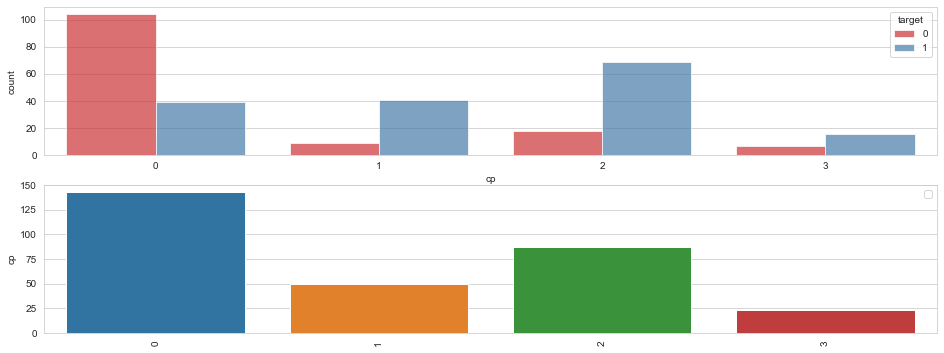

In [12]:
fig, ax = plt.subplots(2,1,figsize=(16, 6))
# type 1 : use hue parameter
sns.countplot(x='cp', data=data, hue='target', palette='Set1', alpha=0.7, ax=ax[0])
plt.legend()
plt.xticks(rotation='vertical')

#type 2: use value_counts + barplot / hard to divide like hue 
sns.barplot(x=data['cp'].value_counts().index, y=data['cp'].value_counts(), ax=ax[1])
plt.show()

If cp is 0 i.e Typical angina (chest pain related decrease blood supply to the heart), that person has less chances to have heart disease.

No handles with labels found to put in legend.


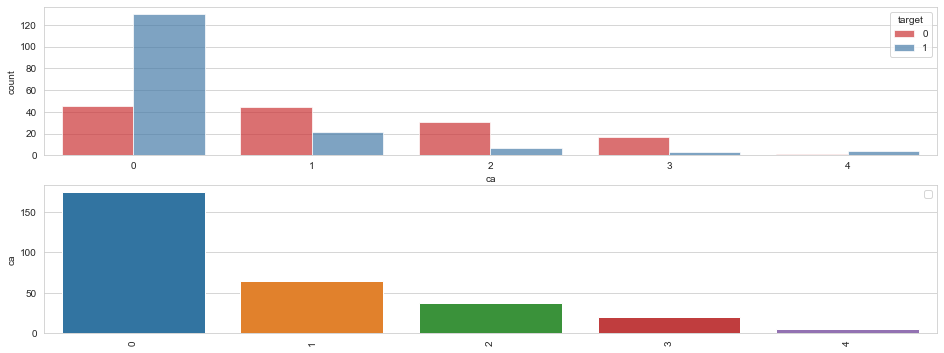

In [13]:
fig, ax = plt.subplots(2,1,figsize=(16, 6))
# type 1 : use hue parameter
sns.countplot(x='ca', data=data, hue='target', palette='Set1', alpha=0.7, ax=ax[0])
plt.legend()
plt.xticks(rotation='vertical')

#type 2: use value_counts + barplot / hard to divide like hue 
sns.barplot(x=data['ca'].value_counts().index, y=data['ca'].value_counts(), ax=ax[1])
plt.show()

If a person has 0 major vessels i.e ca=0, then they are highly prone to heart disease.

No handles with labels found to put in legend.


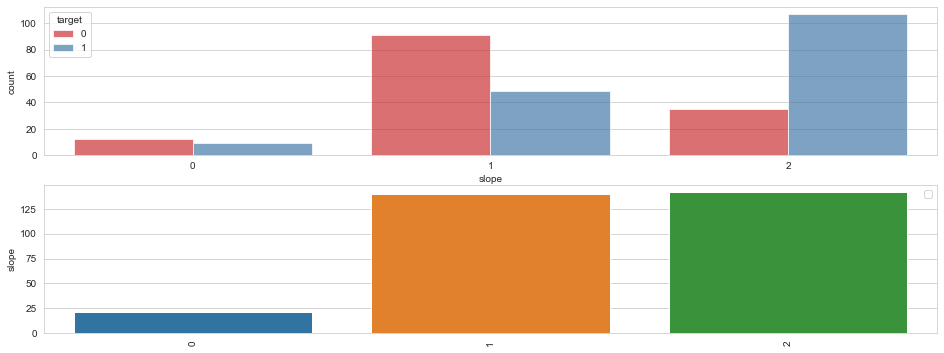

In [14]:
fig, ax = plt.subplots(2,1,figsize=(16, 6))
# type 1 : use hue parameter
sns.countplot(x='slope', data=data, hue='target', palette='Set1', alpha=0.7, ax=ax[0])
plt.legend()
plt.xticks(rotation='vertical')

#type 2: use value_counts + barplot / hard to divide like hue 
sns.barplot(x=data['slope'].value_counts().index, y=data['slope'].value_counts(), ax=ax[1])
plt.show()

If slope=2, then our graph shows that they are more prone to heart disease.

No handles with labels found to put in legend.


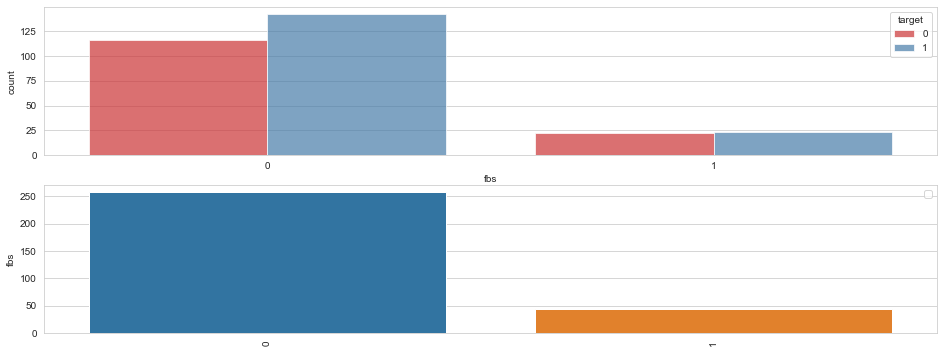

In [15]:
fig, ax = plt.subplots(2,1,figsize=(16, 6))
# type 1 : use hue parameter
sns.countplot(x='fbs', data=data, hue='target', palette='Set1', alpha=0.7, ax=ax[0])
plt.legend()
plt.xticks(rotation='vertical')

#type 2: use value_counts + barplot / hard to divide like hue 
sns.barplot(x=data['fbs'].value_counts().index, y=data['fbs'].value_counts(), ax=ax[1])
plt.show()

This variable doesn't give us any clear cut idea.

No handles with labels found to put in legend.


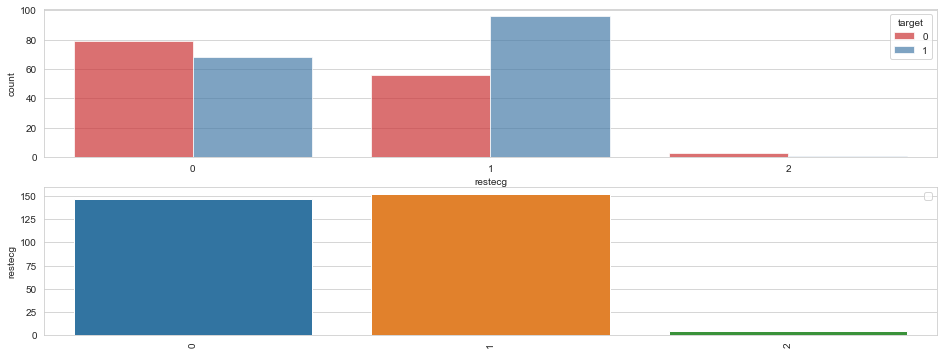

In [16]:
fig, ax = plt.subplots(2,1,figsize=(16, 6))
# type 1 : use hue parameter
sns.countplot(x='restecg', data=data, hue='target', palette='Set1', alpha=0.7, ax=ax[0])
plt.legend()
plt.xticks(rotation='vertical')

#type 2: use value_counts + barplot / hard to divide like hue 
sns.barplot(x=data['restecg'].value_counts().index, y=data['restecg'].value_counts(), ax=ax[1])
plt.show()

If a person's restecg=1 (which represents ST-T Wave abnormality and signals non-normal heart beat), then that person can have heart disease.

No handles with labels found to put in legend.


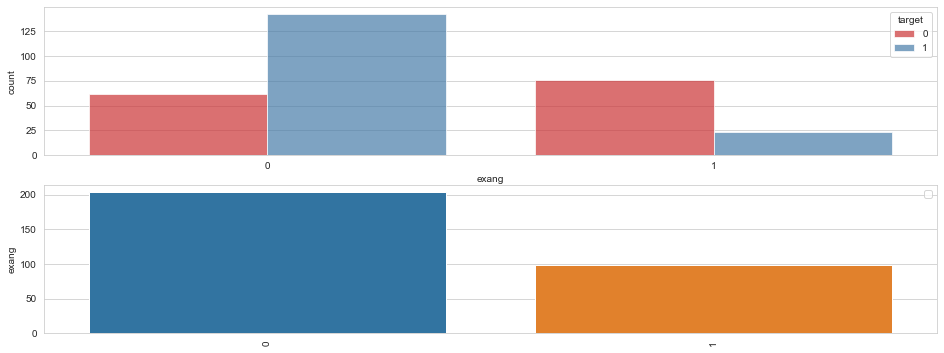

In [17]:
fig, ax = plt.subplots(2,1,figsize=(16, 6))
# type 1 : use hue parameter
sns.countplot(x='exang', data=data, hue='target', palette='Set1', alpha=0.7, ax=ax[0])
plt.legend()
plt.xticks(rotation='vertical')

#type 2: use value_counts + barplot / hard to divide like hue 
sns.barplot(x=data['exang'].value_counts().index, y=data['exang'].value_counts(), ax=ax[1])
plt.show()

This shows, that people who do exercise are less prone to having heart disease.

No handles with labels found to put in legend.


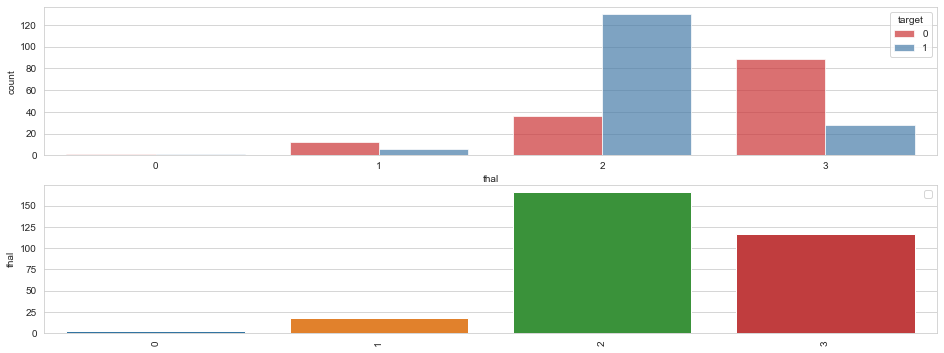

In [18]:
fig, ax = plt.subplots(2,1,figsize=(16, 6))
# type 1 : use hue parameter
sns.countplot(x='thal', data=data, hue='target', palette='Set1', alpha=0.7, ax=ax[0])
plt.legend()
plt.xticks(rotation='vertical')

#type 2: use value_counts + barplot / hard to divide like hue 
sns.barplot(x=data['thal'].value_counts().index, y=data['thal'].value_counts(), ax=ax[1])
plt.show()

People whose thalium stress result is 2, graph shows that they are also prone to heart disease.

## Histogram

Understanding distribution of continuous variables

### Matplotlib

Text(0.5, 1.0, 'Age distribution.')

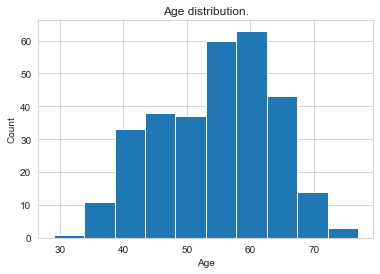

In [19]:
plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution.')

Similarly, we can observe distribution for all other continuous variables.


### Seaborn : distplot

- [Distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot) : Flexibly plot a univariate distribution of observations.

`distplot` is similar to `countplot` because countplot is *a histogram according to frequency*.

Basically, you can look at it with histogram, so it's easier to see trends than countplot.

You cannot set the hue separately, so you need to draw the graphs individually. (you can add `label`)
seaborn combines, histogram, kdeplot, rugplot.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


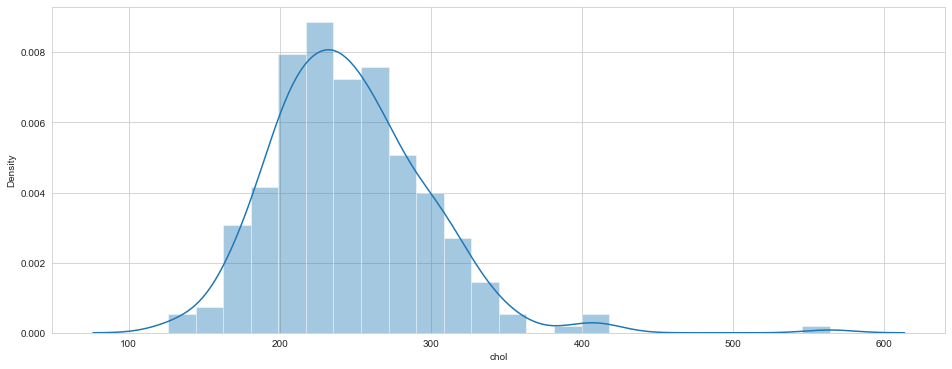

In [20]:
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.distplot(data['chol'])
plt.show()

# By default rugplot is False

From here, we can also observe outlier value of cholestrol, and think if we want to do it's treatment or use it.

If we just want to print histogram instead of kde plot, then we can change some parameters.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


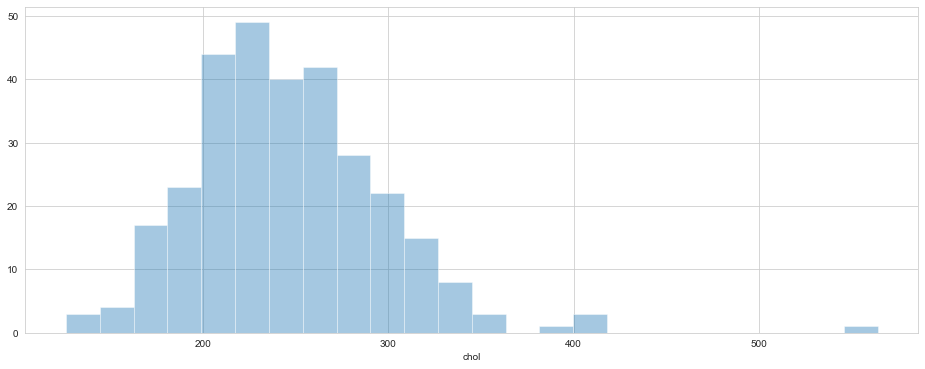

In [21]:
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.distplot(data['chol'], kde=False)
plt.show()

Or we can use kdeplot separately to plot so.

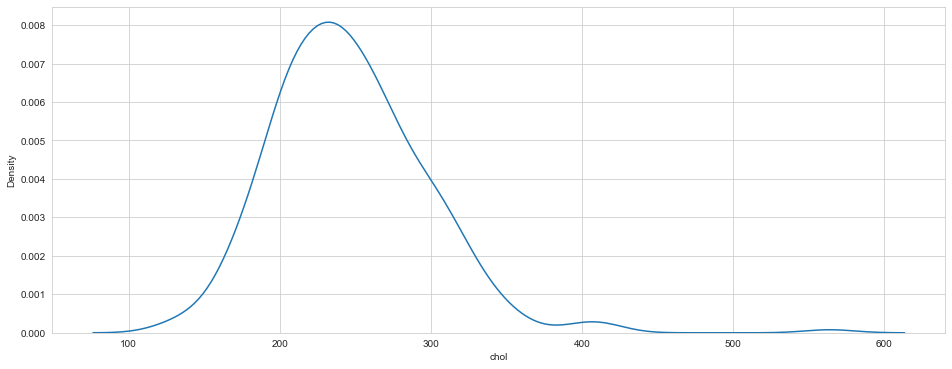

In [23]:
# type 1 : default view
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(data['chol'])
plt.show()

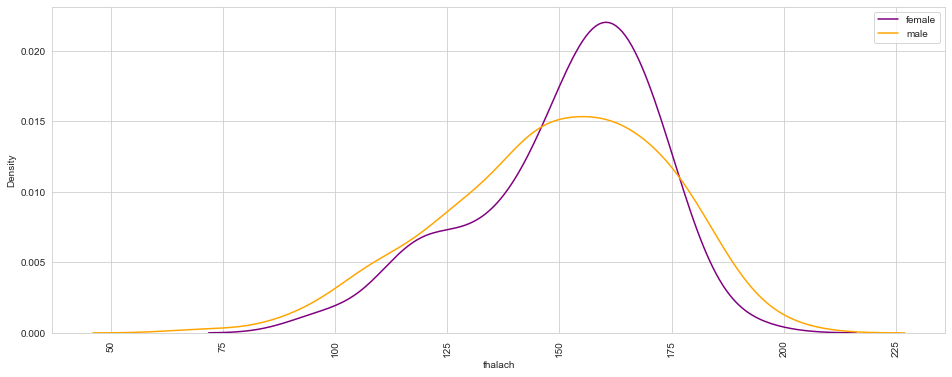

In [24]:
# type 2 : draw 2 graph with label
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(data[data['sex']==0]['thalach'], color='purple', ax=ax, label='female')
sns.kdeplot(data[data['sex']==1]['thalach'], color='orange', ax=ax, label='male')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

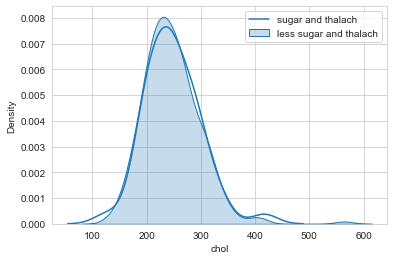

In [25]:
g = data.groupby('fbs')
sugar = g.get_group(1)
no_sugar=g.get_group(0)

fig, ax = plt.subplots()

ax = sns.kdeplot(data=sugar['chol'], label='sugar and thalach', ax=ax)
ax = sns.kdeplot(data=no_sugar['chol'], label='less sugar and thalach', ax=ax, shade=True)

plt.legend()

People with and without sugar show similar pattern of cholestrol

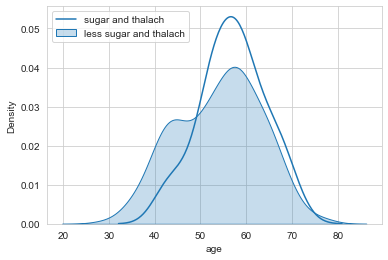

In [26]:
g = data.groupby('fbs')
sugar = g.get_group(1)
no_sugar=g.get_group(0)

fig, ax = plt.subplots()

ax = sns.kdeplot(data=sugar['age'], label='sugar and thalach', ax=ax)
ax = sns.kdeplot(data=no_sugar['age'], label='less sugar and thalach', ax=ax, shade=True)

plt.legend()

There is more chance to have sugar at the age of 55-60

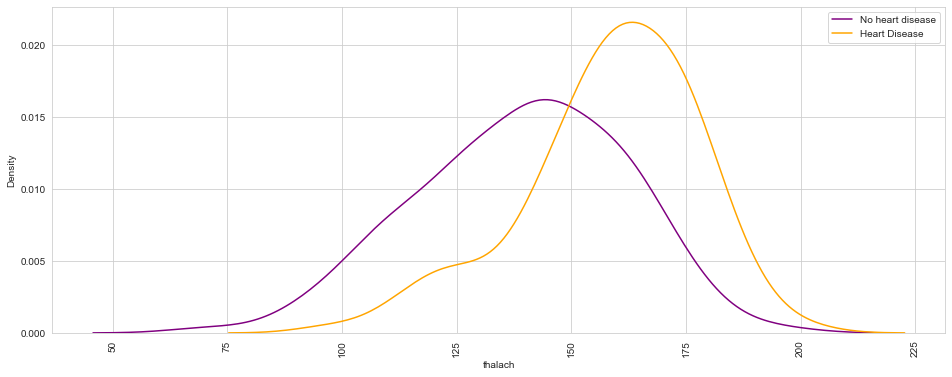

In [27]:
# type 2 : draw 2 graph with label
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(data[data['target']==0]['thalach'], color='purple', ax=ax, label='No heart disease')
sns.kdeplot(data[data['target']==1]['thalach'], color='orange', ax=ax, label='Heart Disease')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

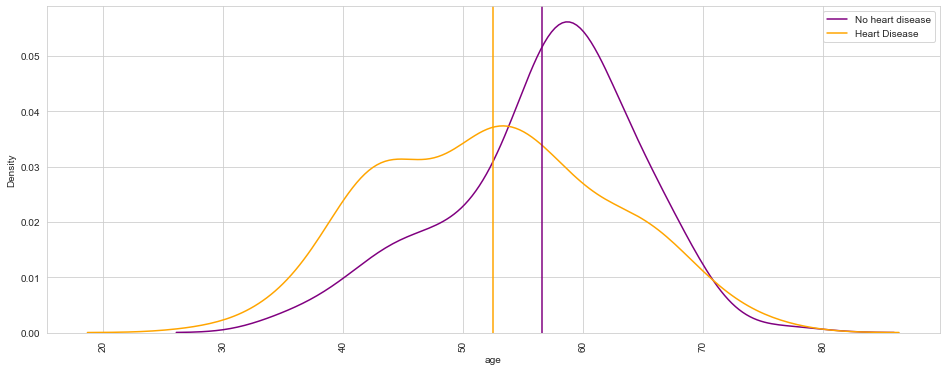

In [28]:
# type 2 : draw 2 graph with label
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(data[data['target']==0]['age'], color='purple', ax=ax, label='No heart disease')
sns.kdeplot(data[data['target']==1]['age'], color='orange', ax=ax, label='Heart Disease')

# avg line
plt.ax
vline(data[data['target']==0]['age'].mean(), color='purple')
plt.axvline(data[data['target']==1]['age'].mean(), color='orange')

plt.xticks(rotation='vertical')
plt.legend()
plt.show()

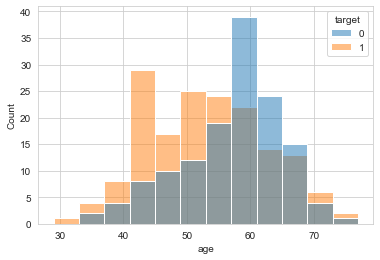

In [29]:
fig_ax = sns.histplot(data=data, x='age', hue='target')

This graph shows that people with age 41-45 are most prone to heart disease, which can be contributed to stress factor. Once we reach age 60 chances to get affected by heart disease reduces. 

If I have to apply distplot on two variables, then we can use displot

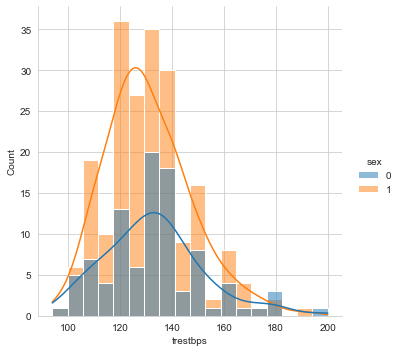

In [30]:
# fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.displot(data=data, x='trestbps',kde='True',hue='sex')   # ,kind='hist'
plt.show()

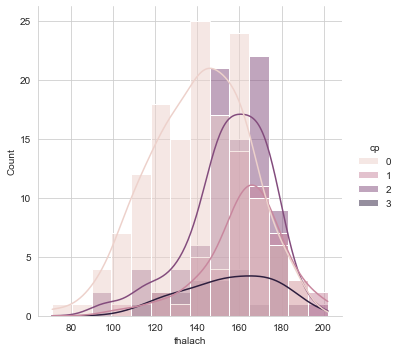

In [31]:
# fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.displot(data=data, x='thalach',kde='True',hue='cp')   # ,kind='hist'
plt.show()

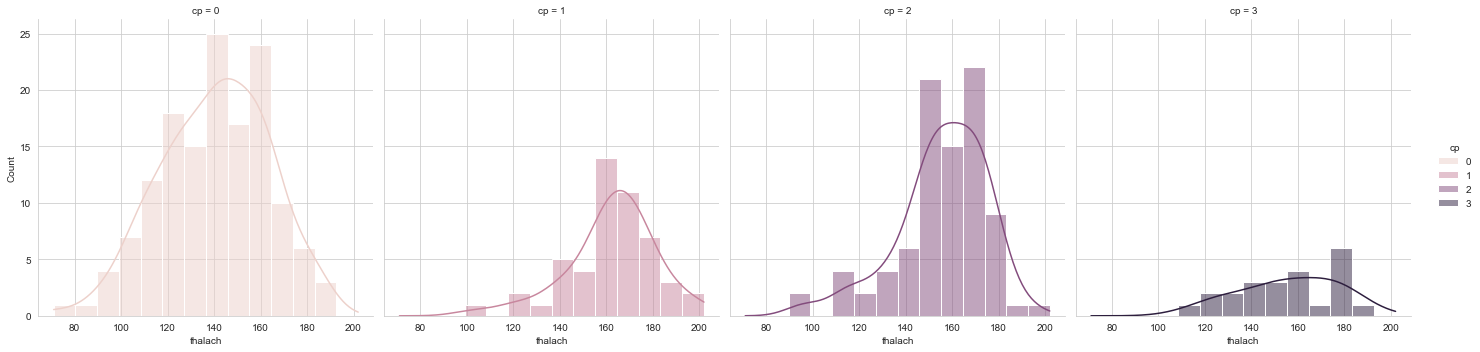

In [32]:
# fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.displot(data=data, x='thalach',kde='True',hue='cp',col='cp')   # ,kind='hist'
plt.show()

    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

Plotting heatmap between variables.

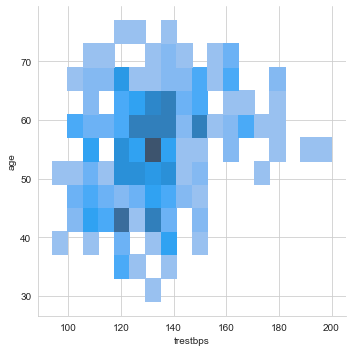

In [33]:
# fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.displot(data=data, x='trestbps',y='age')   # ,kind='hist',hue='sex'
plt.show()

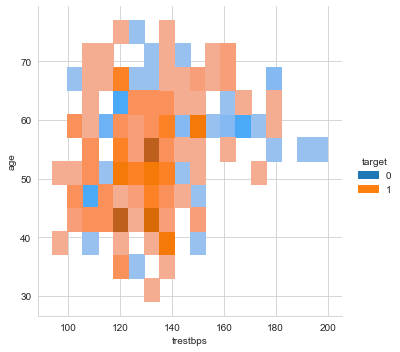

In [34]:
# fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.displot(data=data, x='trestbps',y='age',hue='target')   # ,kind='hist'
plt.show()

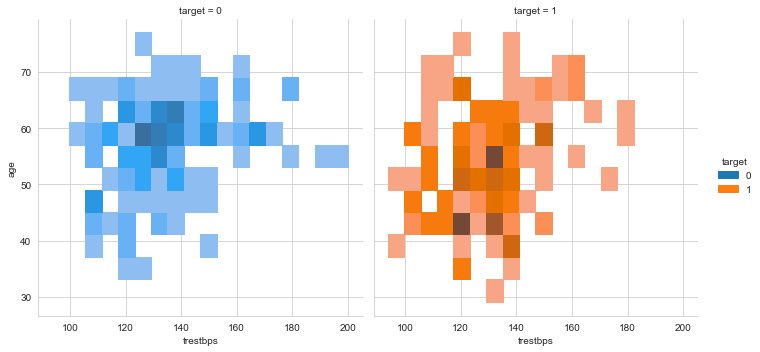

In [35]:
# fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.displot(data=data, x='trestbps',y='age',hue='target',col='target')   # ,kind='hist'
plt.show()

Here, we observe that even though bp is touching 200, that person is not that likely to have heart disease, so it is possible that trestbp may not turn out to be a important deciding factor.

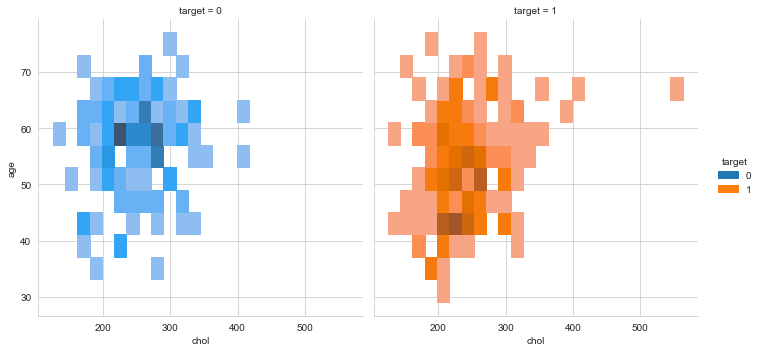

In [36]:
# fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.displot(data=data, x='chol',y='age',hue='target',col='target')   # ,kind='hist'
plt.show()

From here, we can say that a person whose cholestrol is approx 220 and age is 60 they are more likely to not have heart disease. Again, we observe that people in the age range of 41-55 have very high chances of getting heart disease. Also, if a person has very high cholestrol we can see that he/she is most likely to have heart disease.

Similarly, we can try to find relation between all other variables.

Although extra, you can also add a mean line using matplotlib.

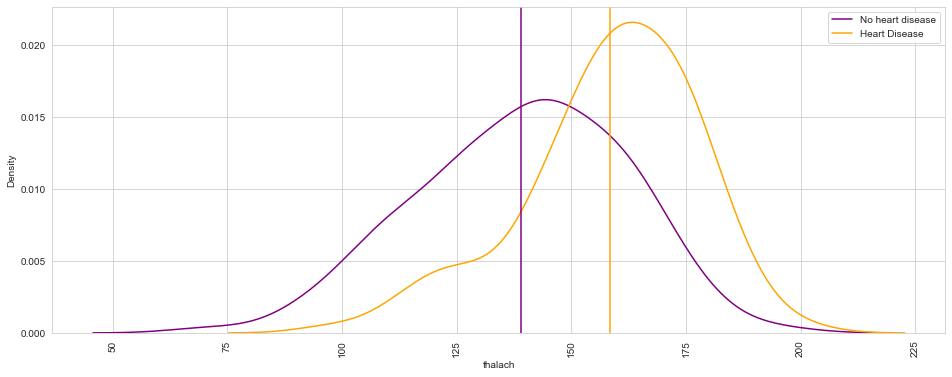

In [37]:
# type 2 : draw 2 graph with label
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(data[data['target']==0]['thalach'], color='purple', ax=ax, label='No heart disease')
sns.kdeplot(data[data['target']==1]['thalach'], color='orange', ax=ax, label='Heart Disease')

# avg line
plt.axvline(data[data['target']==0]['thalach'].mean(), color='purple')
plt.axvline(data[data['target']==1]['thalach'].mean(), color='orange')


plt.xticks(rotation='vertical')
plt.legend()
plt.show()

This shows that people who have heart disease have higher maximum heart rate i.e thalach value.

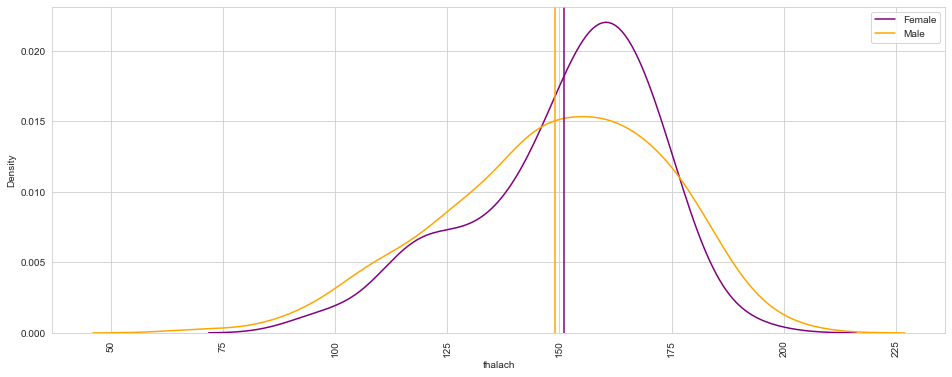

In [38]:
# type 2 : draw 2 graph with label
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(data[data['sex']==0]['thalach'], color='purple', ax=ax, label='Female')
sns.kdeplot(data[data['sex']==1]['thalach'], color='orange', ax=ax, label='Male')

# avg line
plt.axvline(data[data['sex']==0]['thalach'].mean(), color='purple')
plt.axvline(data[data['sex']==1]['thalach'].mean(), color='orange')


plt.xticks(rotation='vertical')
plt.legend()
plt.show()

https://towardsdatascience.com/histograms-vs-kdes-explained-ed62e7753f12

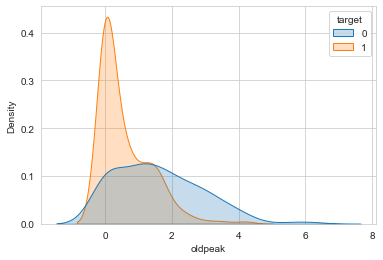

In [39]:
fig_ax = sns.kdeplot(data=data, x='oldpeak', hue='target', shade=True)

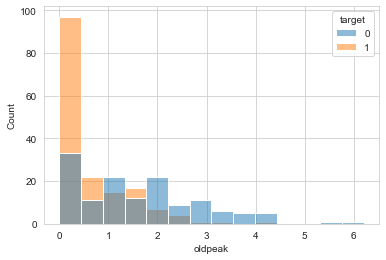

In [40]:
fig_ax = sns.histplot(data=data, x='oldpeak', hue='target')

Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth. Like a histogram, the quality of the representation also depends on the selection of good smoothing parameters.

## Scatter Plot

### Matplotlib

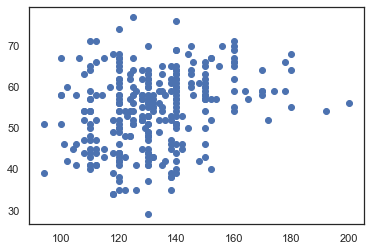

In [70]:
plt.plot(data['trestbps'], data['age'], linestyle='none', marker='o', color='b')
plt.show()

### Seaborn : scatterplot

- [Scatter plot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) : Draw a scatter plot with possibility of several semantic groupings.

Very simple point plotting. But depending on your custom abilities, you can create huge graphs that can handle high-dimensional data.

**Custom parameter**

1. `hue` : Color change by category
2. `style` : marker (+, o, -, etc)
3. `size` : point size

The example will make it easier to understand.

The size is small, but if you look closely, you will be able to feel different parts. Compare with the `legend` section.

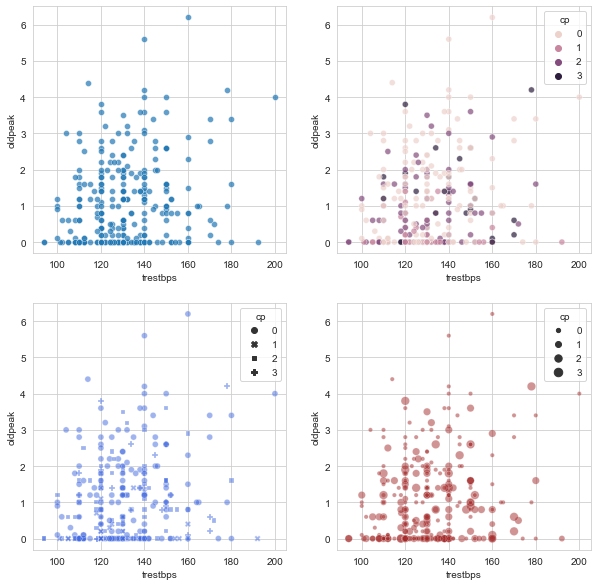

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# type 1 : default scatter plot 
sns.scatterplot(data=data, x='trestbps', y='oldpeak', alpha=0.7, ax=ax[0][0])

# type 2 : with hue
sns.scatterplot(data=data, x='trestbps', y='oldpeak', hue='cp', alpha=0.7, ax=ax[0][1])

# type 3 : with style & color
sns.scatterplot(data=data, x='trestbps', y='oldpeak',style='cp', color='royalblue', alpha=0.5, ax=ax[1][0])

# type 4 : with size & color 
sns.scatterplot(data=data, x='trestbps', y='oldpeak',size='cp', color='brown', alpha=0.5, ax=ax[1][1])

plt.show()

Depending on our comfortability, we can choose parameter accordingly.

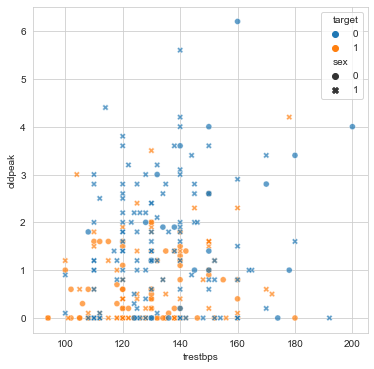

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(data=data, x='trestbps', y='oldpeak',style='sex',hue='target', color='royalblue', alpha=0.7)  # , hue='parental level of education',size='parental level of education'
plt.show()

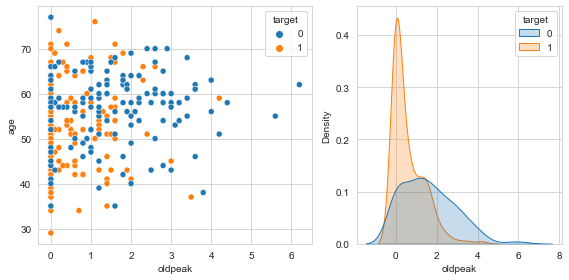

In [44]:
fig, ax = plt.subplots(1,2,figsize=(8,4), gridspec_kw=dict(width_ratios=[4,3]))
sns.scatterplot(data=data, x='oldpeak', y='age', hue='target', ax=ax[0])
sns.kdeplot(data=data, x='oldpeak', hue='target', shade=True, ax=ax[1])
fig.tight_layout()

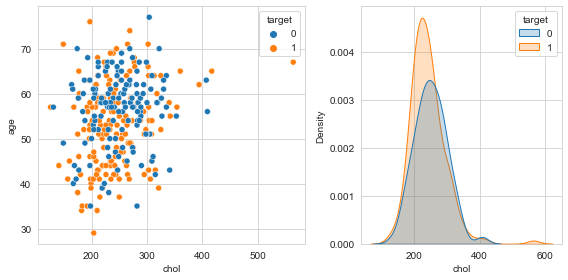

In [45]:
fig, ax = plt.subplots(1,2,figsize=(8,4), gridspec_kw=dict(width_ratios=[4,3]))
sns.scatterplot(data=data, x='chol', y='age', hue='target', ax=ax[0])
sns.kdeplot(data=data, x='chol', hue='target', shade=True, ax=ax[1])
fig.tight_layout()

## Box Plot

Box plots are used to visualize summary statistics of a dataset, displaying attributes of the distribution like the data’s range and distribution.Box Plots visualize continuous variable distribution.

### Matplotlib
[Reference](https://stackabuse.com/matplotlib-box-plot-tutorial-and-examples/)

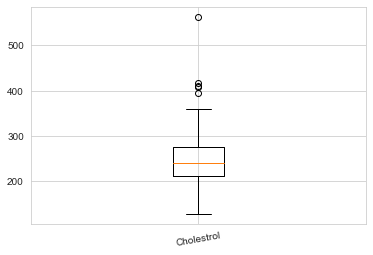

In [46]:
fig, ax = plt.subplots()
ax.boxplot(data["chol"])
plt.xticks([1], ["Cholestrol"], rotation=10)
plt.show()

Here, we can observe the outlier value of cholestrol.

We've extracted the fig and ax objects from the return of the subplots() function, so we can use either of them to call the boxplot() function. Alternatively, we could've just called plt.boxplot().

The Box Plot shows the median of the dataset (the vertical line in the middle), as well as the interquartile ranges (the ends of the boxes) and the minimum and maximum values of the chosen dataset feature (the far end of the “whiskers”).

### Seaborn : boxplot, stripplot, swarmplot

- [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) : Draw a box plot to show distributions with respect to categories.
- [stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html) : Draw a scatterplot where one variable is categorical.
- [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) : Draw a categorical scatterplot with non-overlapping points.


It consists of the minimum value (min), the maximum value (max), the median value (median or second quartile), and 1Q and 3Q (first quartile and third quartile, respectively), and are typically 1.5 times IQR (values ​​of 3Q-1Q) from 1Q. Data points less than or greater than 1.5 IQR from 3Q will be represented as outliers.

Usually I use stripplot(swarmplot) with boxplot to look at distribution and information.

We can look at a single variable or two variables.

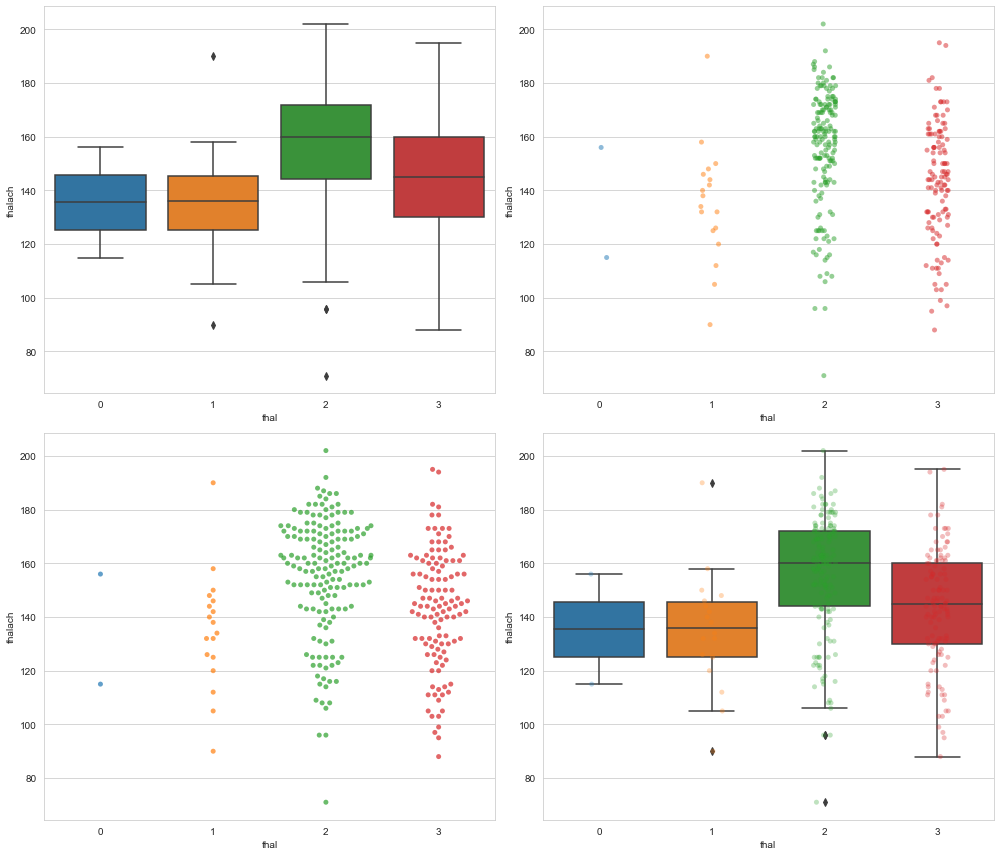

In [47]:
# type 1 : default boxplot & stripplot

fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# boxplot
sns.boxplot(x='thal', y='thalach', data=data, ax=ax[0][0])

# stripplot
sns.stripplot(x='thal', y='thalach', data=data, ax=ax[0][1], alpha=0.5)

# swarmplot 
sns.swarmplot(x='thal', y='thalach', data=data, ax=ax[1][0], alpha=0.7)

# both
sns.boxplot(x='thal', y='thalach', data=data, ax=ax[1][1])
sns.stripplot(x='thal', y='thalach', data=data, ax=ax[1][1], alpha=0.3)

plt.tight_layout()
plt.show()

As with many other seaborn functions, you can add hue parameters.

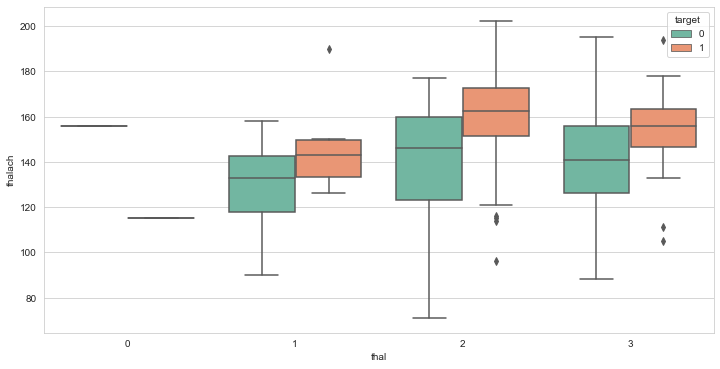

In [48]:
# type 2 : we can add hue parameter
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x='thal', y='thalach', hue='target', palette='Set2', data=data, ax=ax)
plt.show()

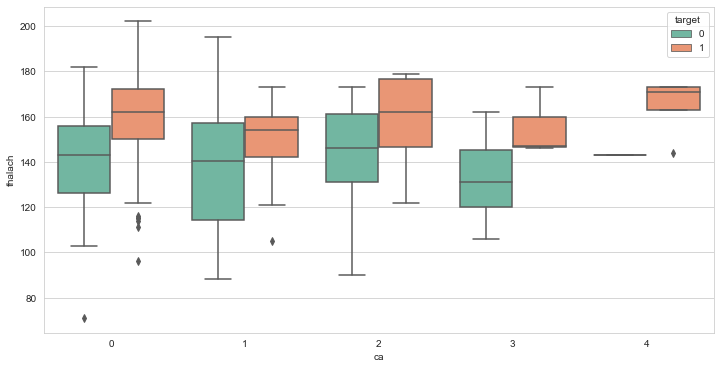

In [49]:
# type 2 : we can add hue parameter
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x='ca', y='thalach', hue='target', palette='Set2', data=data, ax=ax)
plt.show()

In general people who have higher thalach they have higher chances of getting disease irrespective of their ca (i.e number of major vessels)

## Violin Plot 


### Matplotlib

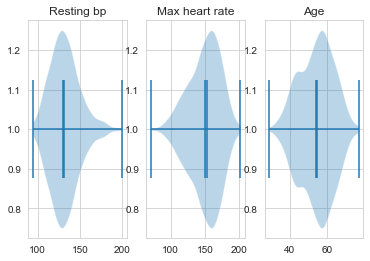

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
ax1.violinplot(data.trestbps, showmedians=True, showmeans=True, vert=False)
ax1.set_title('Resting bp')

ax2.violinplot(data.thalach, showmedians=True, showmeans=True, vert=False)
ax2.set_title('Max heart rate')

ax3.violinplot(data.age, showmedians=True, showmeans=True, vert=False)
ax3.set_title('Age')
plt.show()

### Seaborn : violinplot

- [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) : Draw a combination of boxplot and kernel density estimate.

Almost the same function as box plot, with the difference that it draws kde.

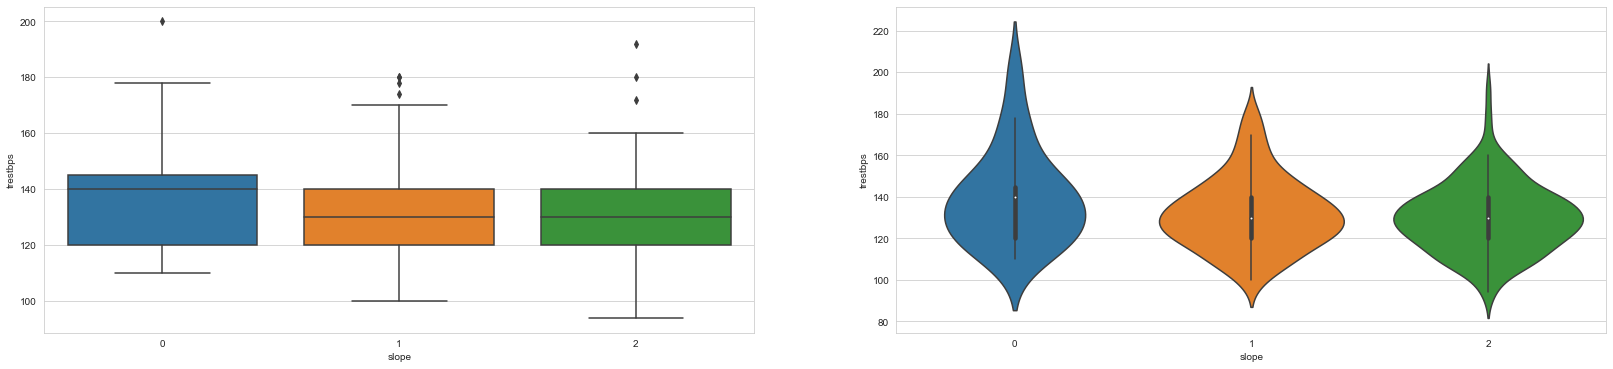

In [51]:
# type 1 : compare with boxplot

fig, ax = plt.subplots(1, 2, figsize=(28, 6))

# boxplot
sns.boxplot(x='slope', y='trestbps', data=data, ax=ax[0])

# violinplot
sns.violinplot(x='slope', y='trestbps', data=data, ax=ax[1])

plt.show()

you can use `hue` parameter

and there are two views.

- split : True
- split : False(default)

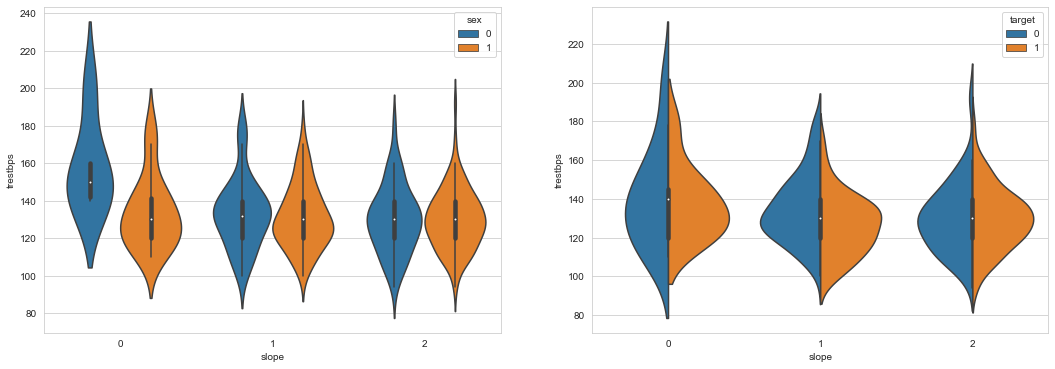

In [52]:
# type 2 : hue parameter

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.violinplot(x='slope', y='trestbps', hue='sex', data=data, ax=ax[0])


# type 3 : hue + split
sns.violinplot(x='slope', y='trestbps', hue='target', data=data, split=True, ax=ax[1])
plt.show()

## Joint Plot
Joint Plots are used to explore relationships between bivariate data, as well as their distributions at the same time.

### Seaborn : jointplot

- [Joint Plot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) : Draw a plot of two variables with bivariate and univariate graphs.

It is distribution picture that Bayes theorem comes to mind.

You can look at the probability of a bivariate based on the value of each variable.

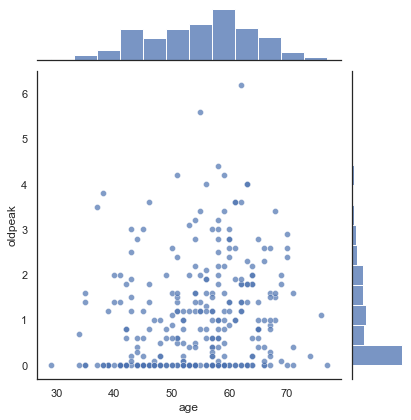

In [53]:
# type 1 : default
sns.set(style="white", color_codes=True) # suitable theme for jointplot
sns.jointplot(data=data, x='age', y='oldpeak', alpha=0.7)
# plt.show()

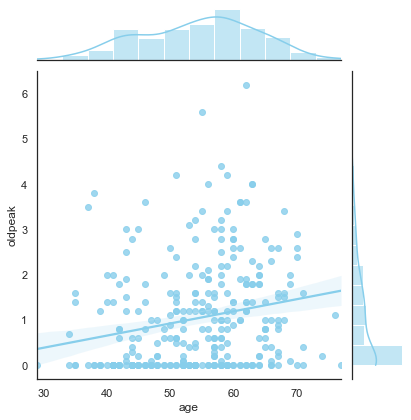

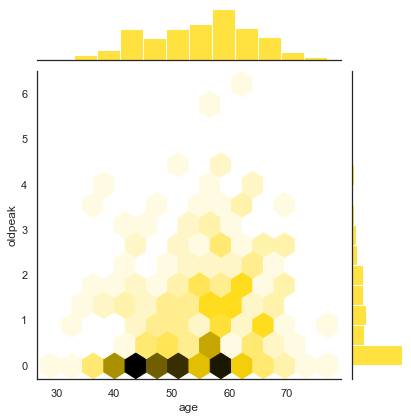

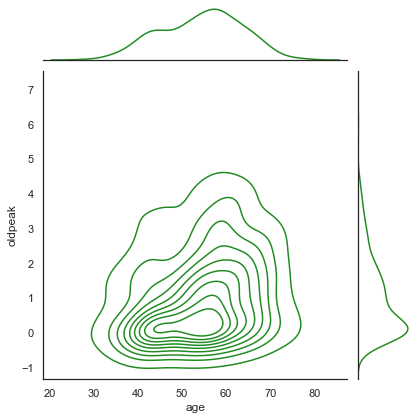

In [54]:
# type 2 : many types (reg, hex, kde)
sns.jointplot(data=data,x='age', y='oldpeak', kind='reg', color='skyblue')
sns.jointplot(data=data,x='age', y='oldpeak', kind='hex', color='gold')
sns.jointplot(data=data,x='age', y='oldpeak', kind='kde', color='forestgreen' )
plt.show()

### Matplotlib

Note: This sort of task is much more fit for libraries such as Seaborn, which has a built-in jointplot() function. With Matplotlib, we'll construct a Joint Plot manually, using GridSpec and multiple Axes objects, instead of having Seaborn do it for us.

[Reference](https://stackabuse.com/matplotlib-scatter-plot-with-distribution-plots-histograms-jointplot/)

In [55]:
from matplotlib.gridspec import GridSpec

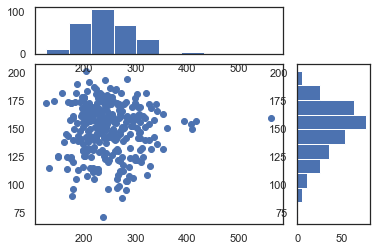

In [56]:
fig = plt.figure()
gs = GridSpec(4, 4)

ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs[0,0:3])
ax_hist_y = fig.add_subplot(gs[1:4, 3])

ax_scatter.scatter(data['chol'], data['thalach'])

ax_hist_x.hist(data['chol'])
ax_hist_y.hist(data['thalach'], orientation = 'horizontal')


plt.show()